# Visualization of final results for the Paper

Active learning 
| Sangwook Cheon 

IOU Performance for all methods against total # images seen

Best: 0.6684468191613574
Worst: 0.6828057481290125
Middle: 0.6777469932754044
Uniform: 0.6749110867993662
Random: 0.6803229099808664
Percentile=0.1: 0.6817215065870994


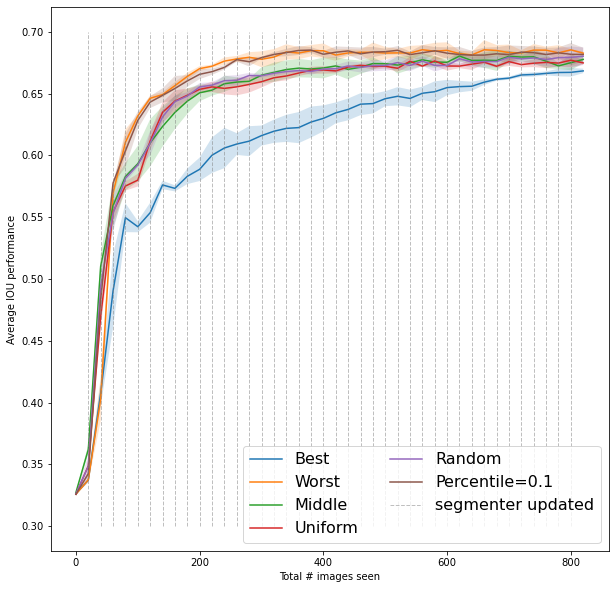

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
# sns.set()
fig.patch.set_facecolor('white')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

gk_base_path = '/usr/xtmp/gk122/mammoproj/nnunet_integration_tmp/AllOracleRuns/'
sc_base_path = '/usr/xtmp/sc834/mammoproj/nnunet_integration_tmp/AllOracleRuns/'

oracle_methods = {
      'Best': [
            os.path.join(sc_base_path, 'Run_8_21_finalrun_best1_10'),
            os.path.join(sc_base_path, 'Run_8_21_finalrun_best2_20'),
            os.path.join(gk_base_path, 'Run_Final_Runs_B30_30'),
            ],
      'Worst': [
            os.path.join(sc_base_path, 'Run_8_21_finalrun_worst1_10'),
            os.path.join(sc_base_path, 'Run_8_21_finalrun_worst2_20'),
            os.path.join(sc_base_path, 'Run_8_21_finalrun_worst3_30'),
            ],
      'Middle': [
            os.path.join(gk_base_path, 'Run_Final_Runs_P5_10_10'),
            os.path.join(gk_base_path, 'Run_Final_Runs_P5_20_20'),
            os.path.join(gk_base_path, 'Run_Final_Runs_P5_30_30'),
            ],
      'Uniform': [
            os.path.join(sc_base_path, 'Run_8_21_finalrun_uniform1_10'),
            os.path.join(sc_base_path, 'Run_8_21_finalrun_uniform2_20'),
            os.path.join(sc_base_path, 'Run_8_21_finalrun_uniform3_30'),
            ],
      'Random': [
            os.path.join(sc_base_path, 'Run_8_21_finalrun_random10_10'),
            os.path.join(gk_base_path, 'Run_Final_Runs_R20_20'),
            os.path.join(sc_base_path, 'Run_8_21_finalrun_random3_30'),
            ],
      'Percentile=0.1': [
            os.path.join(sc_base_path, 'Run_8_21_finalrun_perc1_10'),
            os.path.join(sc_base_path, 'Run_8_21_finalrun_perc1_20'),
            os.path.join(sc_base_path, 'Run_8_21_finalrun_perc1_30'),
            ],
}

for oracle_method in oracle_methods:
      dfs = pd.DataFrame(0, index=range(42), columns=['avg'])

      for run in oracle_methods[oracle_method]:
            cur = os.path.join(run, "segmenter_output.csv")
            df = pd.read_csv(cur)

            if len(df) != 42:
                  print('WRONG RUN_ID')

            values = df.IOU.reset_index(drop=True)
            dfs['avg'] += values
            dfs[run] = values
      
      dfs['avg'] /= len(oracle_methods[oracle_method])

      std = dfs.loc[:, dfs.columns != 'avg'].std(axis=1)

      x = [i for i in range (0, 824, 20)]
      y = dfs.avg
      print(f'{oracle_method}: {y[41]}')
      plt.plot(x, y, label=oracle_method)
      # plt.fill_between(x, y - std, y + std, alpha=0.5)
      plt.fill_between(x, y - 1 * std, y + 1 * std, alpha=0.2) # is technically supposed to be this
    
plt.vlines(x=[list(range(20, 820, 20))], ymin=0.3, ymax=0.7, colors='gray', ls='--', lw=1, label='segmenter updated', alpha=0.5)
plt.xlabel("Total number of images seen")
plt.ylabel('Average IOU')
plt.legend(ncol=2, loc='lower right')

Total # approved labels against total # images seen, for every method

Best: 341.3333333333333
Worst: 360.0
Middle: 349.3333333333333
Uniform: 354.0
Random: 349.3333333333333
Percentile=0.1: 361.3333333333333


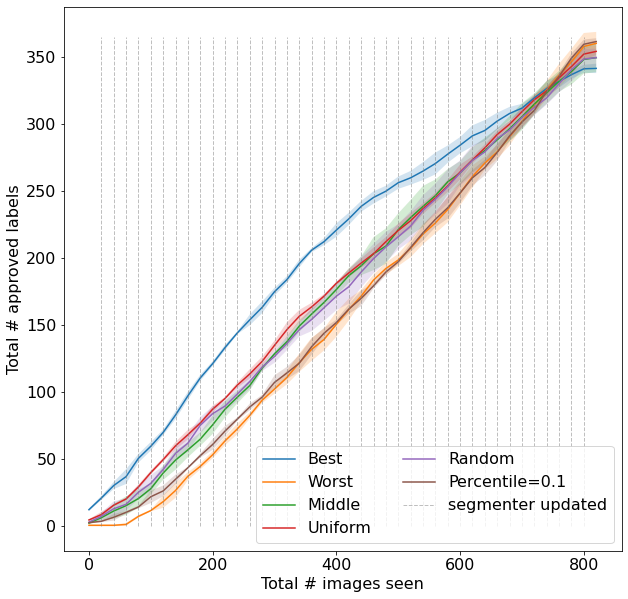

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

for oracle_method in oracle_methods:
      dfs = pd.DataFrame(0, index=range(42), columns=['avg'])

      for run in oracle_methods[oracle_method]:
            cur = os.path.join(run, "segmenter_output.csv")
            df = pd.read_csv(cur)
            
            df['num_correctly_labelled'] = df.loc[:, 'img_seen'] - df.loc[:, 'num_manually_labelled']
            values = df.num_correctly_labelled.reset_index(drop=True)
            dfs['avg'] += values
            dfs[run] = values
      
      dfs['avg'] /= len(oracle_methods[oracle_method])

      std = dfs.loc[:, dfs.columns != 'avg'].std(axis=1)

      x = [i for i in range (0, 824, 20)]
      y = dfs.avg
      print(f'{oracle_method}: {y[41]}')
      plt.plot(x, y, label=oracle_method)
      plt.fill_between(x, y - std, y + std, alpha=0.2)
      # plt.fill_between(x, y - 2 * std, y + 2 * std, alpha=0.5) # is technically supposed to be this

plt.vlines(x=[list(range(20, 820, 20))], ymin=0, ymax=365, colors='gray', ls='--', lw=1, label='segmenter updated', alpha=0.5)
plt.xlabel("Total number of images seen")
plt.ylabel('Total number of approved labels')
plt.legend(ncol=2, loc='lower right')

IOU performance against total # images seen for each percentile method

Percentile=0.1: 0.6817215065870994
Percentile=0.2: 0.6814769887412072
Percentile=0.3: 0.6813888544977088
Percentile=0.4: 0.6769817914855536
Percentile=0.6: 0.6774664571969892
Percentile=0.7: 0.6752668608043076
Percentile=0.8: 0.6736131023331243
Percentile=0.9: 0.6748744371305458


Text(0, 0.5, 'Average IOU performance')

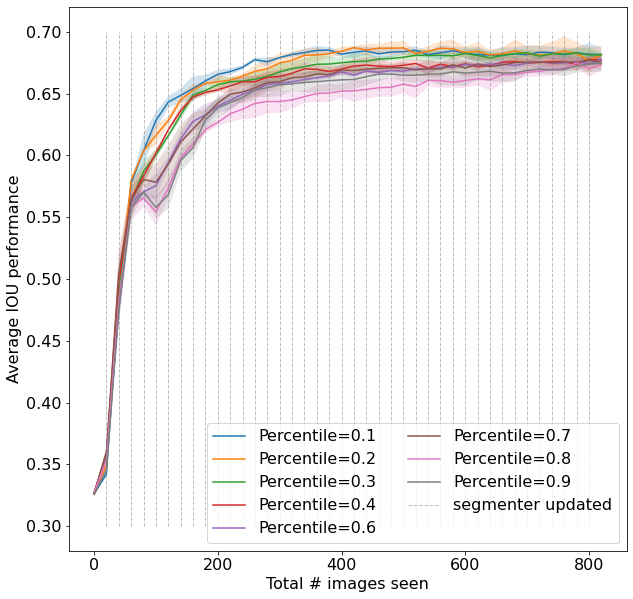

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

gk_base_path = '/usr/xtmp/gk122/mammoproj/nnunet_integration_tmp/AllOracleRuns/'
sc_base_path = '/usr/xtmp/sc834/mammoproj/nnunet_integration_tmp/AllOracleRuns/'

oracle_methods = {
      'Percentile=0.1': [
            os.path.join(sc_base_path, 'Run_8_21_finalrun_perc1_10'),
            os.path.join(sc_base_path, 'Run_8_21_finalrun_perc1_20'),
            os.path.join(sc_base_path, 'Run_8_21_finalrun_perc1_30'),
            ],
      'Percentile=0.2': [
            os.path.join(sc_base_path, 'Run_8_22_finalrun_new_perc2_10'),
            os.path.join(sc_base_path, 'Run_8_21_finalrun_perc2_20'),
            os.path.join(sc_base_path, 'Run_8_21_finalrun_perc2_30'),
            ],
      'Percentile=0.3': [
            os.path.join(gk_base_path, 'Run_Final_Runs_P3_10_10'),
            os.path.join(sc_base_path, 'Run_8_21_finalrun_perc3_20'),
            os.path.join(gk_base_path, 'Run_Final_Runs_P3_30_30'),
            ],
      'Percentile=0.4': [
            os.path.join(gk_base_path, 'Run_Final_Runs_P4_10_10'),
            os.path.join(gk_base_path, 'Run_Final_Runs_P4_10_20'),
            os.path.join(sc_base_path, 'Run_8_21_finalrun_perc4_30'),
            ],
      'Percentile=0.6': [
            os.path.join(sc_base_path, 'Run_8_21_finalrun_perc6_10'),
            os.path.join(gk_base_path, 'Run_Final_Runs_P6_20_20'),
            os.path.join(gk_base_path, 'Run_Final_Runs_P6_30_30'),
            ],
      'Percentile=0.7': [
            os.path.join(sc_base_path, 'Run_8_21_finalrun_perc7_10'),
            os.path.join(gk_base_path, 'Run_Final_Runs_P7_20_20'),
            os.path.join(sc_base_path, 'Run_8_21_finalrun_perc7_30'),
      ],
      'Percentile=0.8': [
            os.path.join(gk_base_path, 'Run_Final_Runs_P8_10_10'),
            os.path.join(sc_base_path, 'Run_8_21_finalrun_perc8_20'),
            os.path.join(gk_base_path, 'Run_Final_Runs_P8_30_30'),
            ],
      'Percentile=0.9': [
            os.path.join(sc_base_path, 'Run_8_21_finalrun_perc9_10'),
            os.path.join(sc_base_path, 'Run_8_21_finalrun_perc9_20'),
            os.path.join(sc_base_path, 'Run_8_22_finalrun_perc9_30'),
            ],
}

for oracle_method in oracle_methods:
      dfs = pd.DataFrame(0, index=range(42), columns=['avg'])

      for run in oracle_methods[oracle_method]:
            cur = os.path.join(run, "segmenter_output.csv")
            df = pd.read_csv(cur)

            if len(df) != 42:
                  print('WRONG RUN_ID')

            values = df.IOU.reset_index(drop=True)
            dfs['avg'] += values
            dfs[run] = values
      
      dfs['avg'] /= len(oracle_methods[oracle_method])

      std = dfs.loc[:, dfs.columns != 'avg'].std(axis=1)

      x = [i for i in range (0, 824, 20)]
      y = dfs.avg
      print(f'{oracle_method}: {y[41]}')
      plt.plot(x, y, label=oracle_method)
      plt.fill_between(x, y - std, y + std, alpha=0.2)
      # plt.fill_between(x, y - 2 * std, y + 2 * std, alpha=0.5) # is technically supposed to be this

plt.vlines(x=[list(range(20, 820, 20))], ymin=0.3, ymax=0.7, colors='gray', ls='--', lw=1, label='segmenter updated', alpha=0.5)
plt.legend(ncol=2, loc='lower right')
plt.xlabel("Total number of images seen")
plt.ylabel('Average IOU')

Total # of approved labels against total # images seen for each percentile method

Percentile=0.1: 361.3333333333333
Percentile=0.2: 357.6666666666667
Percentile=0.3: 359.3333333333333
Percentile=0.4: 356.0
Percentile=0.6: 344.3333333333333
Percentile=0.7: 349.6666666666667
Percentile=0.8: 359.0
Percentile=0.9: 341.3333333333333


Text(0, 0.5, 'Total # approved labels')

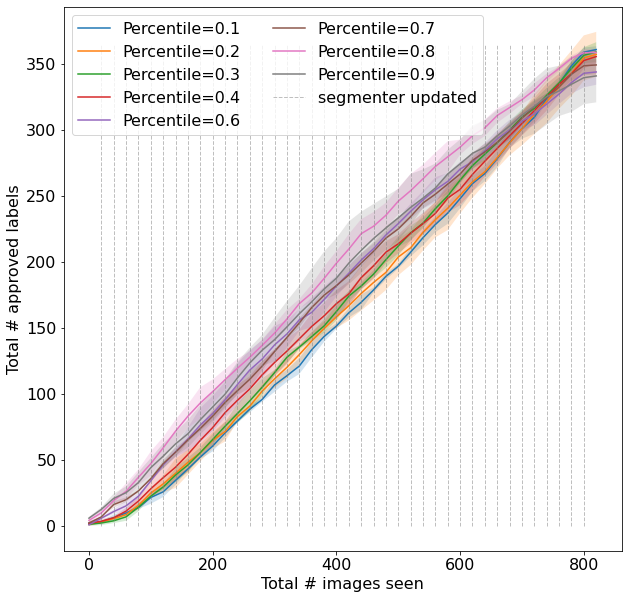

In [ ]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

for oracle_method in oracle_methods:
      dfs = pd.DataFrame(0, index=range(42), columns=['avg'])

      for run in oracle_methods[oracle_method]:
            cur = os.path.join(run, "segmenter_output.csv")
            df = pd.read_csv(cur)
            
            df['num_correctly_labelled'] = df.loc[:, 'img_seen'] - df.loc[:, 'num_manually_labelled']
            values = df.num_correctly_labelled.reset_index(drop=True)
            dfs['avg'] += values
            dfs[run] = values
      
      dfs['avg'] /= len(oracle_methods[oracle_method])

      std = dfs.loc[:, dfs.columns != 'avg'].std(axis=1)

      x = [i for i in range (0, 824, 20)]
      y = dfs.avg
      print(f'{oracle_method}: {y[41]}')
      plt.plot(x, y, label=oracle_method)
      plt.fill_between(x, y - std, y + std, alpha=0.2)
      # plt.fill_between(x, y - 2 * std, y + 2 * std, alpha=0.5) # is technically supposed to be this

plt.vlines(x=[list(range(20, 820, 20))], ymin=0, ymax=365, colors='gray', ls='--', lw=1, label='segmenter updated', alpha=0.5)
plt.legend(ncol=2, loc='upper left')
plt.xlabel("Total number of images seen")
plt.ylabel('Total number of approved labels')